In [5]:
import torch
import matplotlib.pyplot as plt

In [6]:
import torch
import torch.nn as nn
class fcnn(nn.Module):
    def __init__(self,n_input=2,n_hidden=4,n_output=1):
        super(fcnn,self).__init__()
        #activation=nn.Sigmoid
        #self.input_layer=nn.Sequential(*[nn.Linear(n_input,n_hidden),activation()])
        self.input_layer=nn.Linear(n_input,n_hidden)
        self.output_layer=nn.Linear(n_hidden,n_output)
    def forward(self,x):
        x=self.input_layer(x)
       # x=nn.functional.sigmoid(x)
        x=1./(1+torch.exp(-x))
        x=self.output_layer(x)
        return x

In [10]:
x=torch.tensor([[0,0],[0,1],[1,0],[1,1]],requires_grad=False,dtype=torch.float32)
y=torch.tensor([0,1,1,0],requires_grad=False,dtype=torch.float32).view(-1,1)
model=fcnn()
loss_function=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.1)
loss_list=[]

In [11]:
n_iter=6000
for epoch in range(n_iter):
    optimizer.zero_grad()
    y_predictive=model(x)
    loss=loss_function(y_predictive,y)
    loss_list.append(loss.detach().numpy())
    loss.backward()
    optimizer.step()

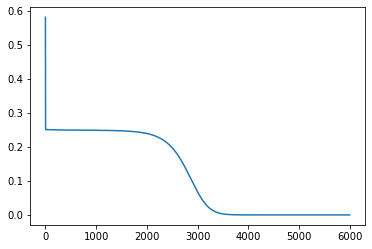

In [12]:
plt.plot(loss_list)

In [ ]:
y_predictive